## Compute Matrix Inverse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix

In [2]:
# Size of the square matrix
m = 3

A = np.random.randn(m,m)
print(A)
print()
# Inverse
Ainv = np.linalg.inv(A)
print(Ainv)
print()
# Double-check by multiplying
idm = A @ Ainv
print(idm)

[[ 0.08301172  0.76837902  1.26860083]
 [ 2.55399882 -0.61117001  0.64584385]
 [-0.69552345 -1.01458723  0.78655235]]

[[-0.03061835  0.33179401 -0.22305528]
 [ 0.43118027 -0.16622967 -0.55894213]
 [ 0.52911191  0.07897251  0.3531415 ]]

[[ 1.00000000e+00 -3.40229202e-17  2.86963866e-18]
 [-2.34484609e-17  1.00000000e+00 -5.43582794e-17]
 [ 1.38110323e-17  3.13677488e-17  1.00000000e+00]]


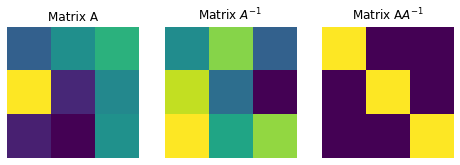

In [3]:
fig,ax = plt.subplots(1,3, figsize = (8,8))
ax[0].imshow(A)
ax[0].set_title("Matrix A")
ax[0].axis("off")
ax[1].imshow(Ainv)
ax[1].set_title("Matrix $A^{-1}$")
ax[1].axis("off")
ax[2].imshow(idm)
ax[2].set_title("Matrix A$A^{-1}$")
ax[2].axis("off")
plt.show()

## Code Challenge: The MCA Algorithm

In [4]:
m = 6
A = np.random.randn(m,m)

# Minors matrix
minors = np.zeros((m,m))
H = np.zeros((m,m))

for i in range(m):
    for j in range(m):
        # Select rows and columns
        rows = [True]*m
        rows[i] = False
        
        cols = [True]*m
        cols[j] = False
        
        # Minors matrix
        minors[i,j] = np.linalg.det(A[rows,:][:,cols])
        
        # H matrix
        H[i,j] = (-1)**(i+j)
        
# Cofactors matrix
C = H*minors

# The adjugate
Ainv = C.T/np.linalg.det(A)

print(np.round(Ainv@A))

[[ 1.  0. -0. -0.  0. -0.]
 [ 0.  1.  0. -0.  0.  0.]
 [ 0.  0.  1. -0. -0.  0.]
 [-0.  0. -0.  1. -0. -0.]
 [-0. -0. -0.  0.  1.  0.]
 [-0. -0. -0.  0. -0.  1.]]


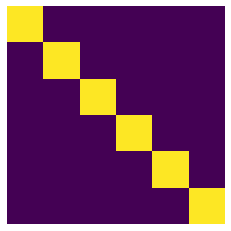

In [5]:
plt.imshow(Ainv@A)
plt.axis("off");

In [6]:
print(Ainv - np.linalg.inv(A))

[[-1.11022302e-16  2.22044605e-16  0.00000000e+00 -1.11022302e-16
   0.00000000e+00  0.00000000e+00]
 [ 4.44089210e-16 -1.11022302e-16 -8.32667268e-17  0.00000000e+00
   4.44089210e-16 -7.97972799e-17]
 [ 5.55111512e-17 -1.38777878e-16 -5.55111512e-17  0.00000000e+00
   5.55111512e-17  0.00000000e+00]
 [-2.22044605e-16  1.11022302e-16  0.00000000e+00  4.44089210e-16
   4.44089210e-16  5.55111512e-17]
 [-6.93889390e-17  2.22044605e-16 -2.22044605e-16 -5.55111512e-17
  -5.55111512e-17 -2.22044605e-16]
 [ 4.44089210e-16  2.22044605e-16 -6.66133815e-16  6.66133815e-16
   8.88178420e-16  0.00000000e+00]]


## Inverse via Row Reduction

In [7]:
# define matrix dimensions
m = 4
A = Matrix(np.round(10*np.random.randn(m,m)), dtype="float")
A

Matrix([
[28.0,   9.0, -23.0, -1.0],
[ 8.0,  -3.0,  -2.0, 11.0],
[13.0, -23.0,   5.0, -3.0],
[-2.0,  12.0,   3.0, -6.0]])

In [8]:
# Augment A and identity Matrix
# axis=1 is same as cbind()
Aaug = Matrix(np.concatenate((A, np.eye(m,m)), axis=1))
Aaug

Matrix([
[28.0,   9.0, -23.0, -1.0, 1.0,   0,   0,   0],
[ 8.0,  -3.0,  -2.0, 11.0,   0, 1.0,   0,   0],
[13.0, -23.0,   5.0, -3.0,   0,   0, 1.0,   0],
[-2.0,  12.0,   3.0, -6.0,   0,   0,   0, 1.0]])

In [9]:
Asol = Aaug.rref()
Asol[0]

Matrix([
[1, 0, 0, 0,  0.0118301528061404, 0.0462643475811563,  0.0331666784029294, 0.0662629392296317],
[0, 1, 0, 0, 0.00238246132901439, 0.0301504588878717, -0.0141539328216323, 0.0619557308170786],
[0, 0, 1, 0, -0.0275802173555853, 0.0647606976034552,  0.0357721287233293,  0.105438584137267],
[0, 0, 0, 1, -0.0129685702884773, 0.0772598173837523,  -0.021477360749243, -0.012123559373753]])

In [10]:
Ainvrref = Asol[0][:, m:m*2]
Ainvrref

Matrix([
[ 0.0118301528061404, 0.0462643475811563,  0.0331666784029294, 0.0662629392296317],
[0.00238246132901439, 0.0301504588878717, -0.0141539328216323, 0.0619557308170786],
[-0.0275802173555853, 0.0647606976034552,  0.0357721287233293,  0.105438584137267],
[-0.0129685702884773, 0.0772598173837523,  -0.021477360749243, -0.012123559373753]])

In [11]:
# Works only in sympy
Ainv = A.inv()
Ainv

Matrix([
[ 0.0118301528061404, 0.0462643475811563,  0.0331666784029294, 0.0662629392296317],
[0.00238246132901439, 0.0301504588878717, -0.0141539328216323, 0.0619557308170786],
[-0.0275802173555853, 0.0647606976034552,  0.0357721287233293,  0.105438584137267],
[-0.0129685702884773, 0.0772598173837523,  -0.021477360749243, -0.012123559373753]])

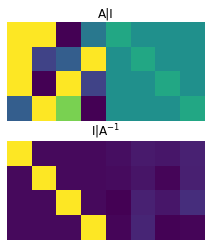

In [12]:
# Visualize them
plt.subplot(211)
plt.imshow(np.array(Aaug, dtype="float"), vmin=-5,vmax=5)
plt.title("A|I")
plt.axis("off")
plt.subplot(212)
plt.imshow(np.array(Asol[0], dtype="float"))#, vmin=-5,vmax=5)
plt.title("I|A$^{-1}$")
plt.axis("off")

plt.show()

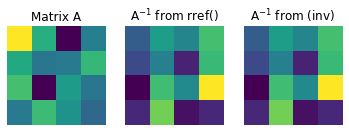

In [13]:
# Visualize them
plt.subplot(131)
plt.imshow(np.array(A, dtype="float"))#, vmin=-5,vmax=5)
plt.title("Matrix A")
plt.axis("off")

plt.subplot(132)
plt.imshow(np.array(Ainvrref, dtype="float")) #, vmin=-5,vmax=5)
plt.title("A$^{-1}$ from rref()")
plt.axis("off")

plt.subplot(133)
plt.imshow(np.array(Ainv, dtype="float"))#, vmin=-5,vmax=5)
plt.title("A$^{-1}$ from (inv)")
plt.axis("off")

plt.show()

## Code Challenge: Diagonal Matrices and their Inverses

In [14]:
# Create diagonal matrices starting with 2x2
# compute their inverses

A = np.array([[2,0], [0,3]])
print(A)
print()
print(np.linalg.inv(A))

[[2 0]
 [0 3]]

[[0.5        0.        ]
 [0.         0.33333333]]


In [15]:
# Automatic generation
A = np.diag(np.arange(1,6))
print(A)
print()
print(np.linalg.inv(A))

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]

[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [-0.         -0.         -0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [16]:
# Create diagonal matrices as you wish
np.diag([1,6,3,8,9,33])

array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0, 33]])

In [17]:
# Create random diagonal values
B = np.diag(np.round(5*np.random.randn(5)))
B

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0.],
       [ 0.,  0.,  0., -5.,  0.],
       [ 0.,  0.,  0.,  0., -5.]])

In [18]:
np.linalg.inv(B)

array([[ 1. ,  0. ,  0. ,  0. ,  0. ],
       [-0. , -0.5, -0. , -0. , -0. ],
       [-0. , -0. , -0.2, -0. , -0. ],
       [-0. , -0. , -0. , -0.2, -0. ],
       [-0. , -0. , -0. , -0. , -0.2]])

## Left- and Right-Inverse

In [19]:
# m>n for Left Inverse
# m<n for right inverse
m = 6
n = 3
A = np.random.randn(m,n)

# A transpose A
AtA = A.T @ A
# A A transpose
AAt = A @ A.T

print(AtA)
print()
print(AAt)

[[13.24141643  3.81447126 -1.21933176]
 [ 3.81447126  1.43643758 -0.83870291]
 [-1.21933176 -0.83870291  5.52841683]]

[[ 0.75512148  0.13680724  1.01627301 -0.88418669  0.11380077 -2.61093581]
 [ 0.13680724  0.8832307   0.24924615  1.50460535  1.56483022  0.31493588]
 [ 1.01627301  0.24924615  1.52247231 -0.94007582  0.24472107 -3.31494734]
 [-0.88418669  1.50460535 -0.94007582  4.36586399  2.84035047  4.70015242]
 [ 0.11380077  1.56483022  0.24472107  2.84035047  2.79932619  1.0001748 ]
 [-2.61093581  0.31493588 -3.31494734  4.70015242  1.0001748   9.88025617]]


In [20]:
print("The rank of AtA is:", np.linalg.matrix_rank(AtA))
print("The rank of AAt is:", np.linalg.matrix_rank(AAt))

The rank of AtA is: 3
The rank of AAt is: 3


In [21]:
# Left Inverse
Aleft = np.linalg.inv(AtA)@A.T
print(Aleft.shape)

(3, 6)


In [22]:
Aright = A.T @ np.linalg.inv(AAt)
print(Aright.shape)

(3, 6)


In [23]:
I_left = Aleft @ A
I_right = A @ Aright
print(I_left.shape)
print()
print(I_right.shape)

(3, 3)

(6, 6)


In [24]:
# Check if we can obtain identity
AtA_inv = np.linalg.inv(AtA)
I_AtA = AtA_inv @ AtA
print(I_AtA)

[[ 1.00000000e+00 -7.90896476e-17  1.64201278e-16]
 [-1.72756184e-15  1.00000000e+00 -8.70645405e-16]
 [-7.48825971e-17  1.51256267e-17  1.00000000e+00]]


In [25]:
# It fails because the rank of matrix is 3
AAt_inv = np.linalg.inv(AAt)
I_AAt = AAt_inv @ AAt
print(I_AAt)

[[ 3.          1.          3.         -1.125       1.         -8.        ]
 [-1.         -2.         -1.         -4.         -4.          2.5625    ]
 [-0.25       -0.16992188  0.5         0.         -0.90625     0.        ]
 [ 0.25        0.125       0.25        0.8125      0.875      -0.5       ]
 [-0.10839844  0.5625     -0.0625      0.0625      1.703125   -0.6875    ]
 [ 0.          0.09375     0.          0.         -0.21875     1.        ]]


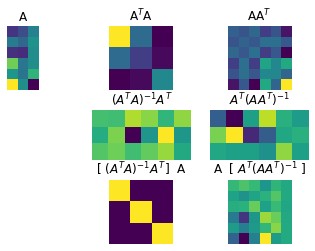

In [26]:
# Plot
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()

## PseudoInverse

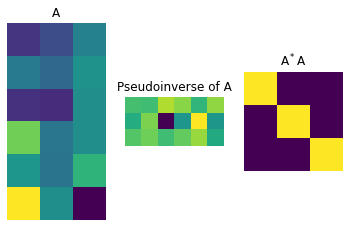

In [27]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [28]:
 # create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))

rank = 49


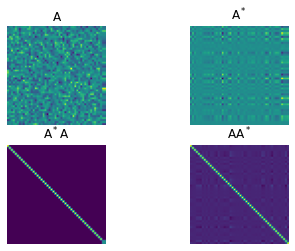

In [29]:
# compute the pseudoinverse
Ai = np.linalg.pinv(A)
# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

## PseudoInverse and Inverse Same for Invertible Matrices

In [30]:
# pseudoinverse of rectangular matrix A
m = 5
A = np.random.randn(m,m)

AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

print(np.round(AinvF,3))
print()
print(np.round(AinvP,3))
print()
print(np.round(AinvP - AinvF, 3))

[[-0.043  0.189  0.151 -0.266  0.171]
 [-0.079  0.305  0.169  0.314 -0.021]
 [ 0.051 -0.592  0.369  0.208 -0.281]
 [-0.476  0.393 -0.653 -0.066  1.023]
 [-0.096 -0.263  0.375 -0.155 -0.762]]

[[-0.043  0.189  0.151 -0.266  0.171]
 [-0.079  0.305  0.169  0.314 -0.021]
 [ 0.051 -0.592  0.369  0.208 -0.281]
 [-0.476  0.393 -0.653 -0.066  1.023]
 [-0.096 -0.263  0.375 -0.155 -0.762]]

[[ 0. -0.  0.  0.  0.]
 [-0.  0. -0.  0. -0.]
 [ 0.  0.  0. -0. -0.]
 [-0.  0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.]]
